<div style="background-color: #FFE333; color: #010100; padding: 40px; border-radius: 40px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1); text-align: center;">
    <h1 style="margin: 0; font-weight: bold; color: #010100;">Laptop Price Prediction for SmartTech Co</h1>
    <p>SmartTech Co. has partnered with our data science team to develop a robust machine learning model that predicts laptop prices accurately. As the market for laptops continues to expand with a myriad of brands and specifications, having a precise pricing model becomes crucial for both consumers and manufacturers.</p>
</div>




<h1 style="margin: 0;">Column Description: </h1>

- Brand:  The brand of the laptop (e.g., Apple, HP, Acer, Dell, Asus, Lenovo etc).


- Type:  The type of laptop (e.g., Ultrabook, Notebook, Gaming, 2 in 1 Convertible).


- Screen Size (in inches):  The size of the laptop screen.


- Screen Resolution:  The resolution of the laptop screen.


- CPU:  The processor type and speed (e.g., Intel Core i5 2.3GHz, AMD A9-Series 9420 3GHz).


- RAM (in GB):  The amount of Random Access Memory (RAM) in gigabytes.


- Storage Type:  The type of storage device (e.g., SSD, Flash Storage, HDD).


- Storage Size:  The capacity of the storage device (e.g., 128GB SSD, 500GB HDD).


- GPU:  The Graphics Processing Unit (GPU) and its specifications (e.g., Intel Iris Plus Graphics 640, Nvidia GeForce GTX 1050).


- Operating System:  The operating system pre-installed on the laptop (e.g., macOS, Windows 10, Linux).


- Weight (in kg):  The weight of the laptop.


- Price:  The price of the laptop in our local currency.

<div "padding: 40px; border-radius: 20px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);">
    <h1>Project Overview:</h1>

 - This project uses supervised machine learning algorithm in which Gradient Boosting Regressor has performed best among all regression models by scoring an accuracy rate of 85% after hyper parameter tuning

 - Here Price is the target variable and all the other factors like Company,TypeName,Inches,Operating system,weight etc are the features affecting the price of the laptop.
 
 - I have used various graphs indicating the EDA of the various features and the distribution of actual vs predicted values use a nice background color for this
 
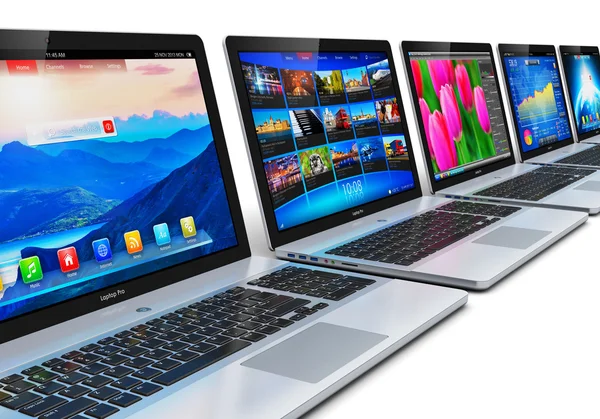


<div style="background-color: #33FFE6; padding: 20px; border-radius: 10px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1); text-align: left;">
    <h1 style="margin: 0;font-weight: bold; color: #010100;">Problem Statements:</h1>
    <h2 style="color: #000000; font-weight: bold;">1. Which features have the most significant impact on laptop prices?</h2>
    <h2 style="color: #000000; font-weight: bold;">2. Can the model accurately predict the prices of laptops from lesser-known brands?</h2>
    <h2 style="color: #000000; font-weight: bold;">3. Does the brand of the laptop significantly influence its price?</h2>
    <h2 style="color: #000000; font-weight: bold;">4. How well does the model perform on laptops with high-end specifications compared to budget laptops?</h2>
    <h2 style="color: #000000; font-weight: bold;">5. What are the limitations and challenges in predicting laptop prices accurately?</h2>
    <h2 style="color: #000000; font-weight: bold;">6. How does the model perform when predicting the prices of newly released laptops not present in the training dataset?</h2>
</div>


In [1]:
 # LETS EXPLORE THE DATASET TO FIND SOLUTIONS TO THE PROBLEM STATEMENT!
    

# System Methodology
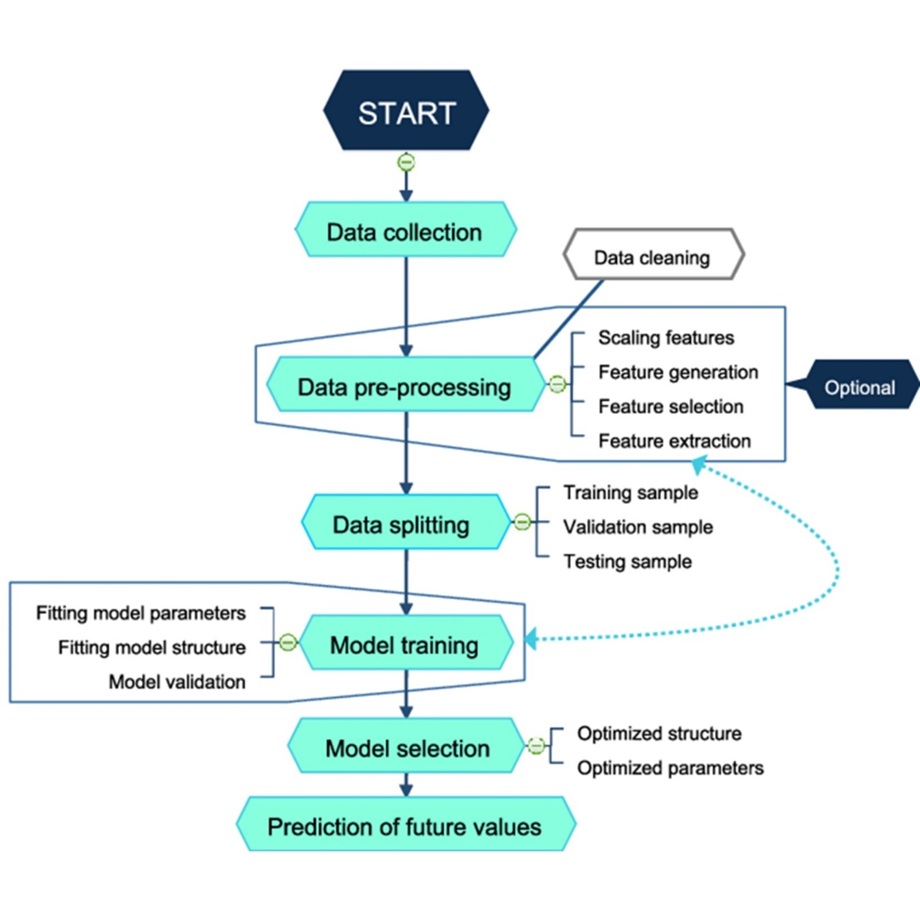![image.png](attachment:2c73044b-7de1-4b4a-880d-a1cd9ef330ad.png)

In [2]:
#importing libraries

import pandas as pd                 #for Eda 
import numpy as np                  #for numerical calculations
import matplotlib.pyplot as plt     #for graphical representation
import seaborn as sns               #for graphical representation

In [3]:
a = pd.read_csv("laptop.csv")  #importing the dataset
df = a.copy()  #making a copy of the dataset

In [4]:
#Checking the shape of the data
df.shape

(1303, 13)

In [5]:
#Top 5 rows
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
#Last 5 rows
df.tail()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,1302.0,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [7]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [8]:
#describing the data
df.describe()

,Unnamed: 0.1,Unnamed: 0,Price
count,1303.00000,1273.000000,1273.000000
mean,651.00000,652.674784,59955.814073
std,376.28801,376.493027,37332.251005
min,0.00000,0.000000,9270.720000
25%,325.50000,327.000000,31914.720000
50%,651.00000,652.000000,52161.120000
75%,976.50000,980.000000,79333.387200
max,1302.00000,1302.000000,324954.720000


# DATA PRE-PROCESSING

In [9]:
#defining the columns
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [10]:
#dropping the unnecessary columns
df.drop(columns=["Unnamed: 0.1","Unnamed: 0"],inplace=True)

#note-since index is already there so no need of extra index columns, hence dropped

In [11]:
df.head(2)


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [12]:
#checking for missing values
df.isnull().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

Note there are 30 missing values which donot have any information as per the excel also, hence dropping them as they are of no use.

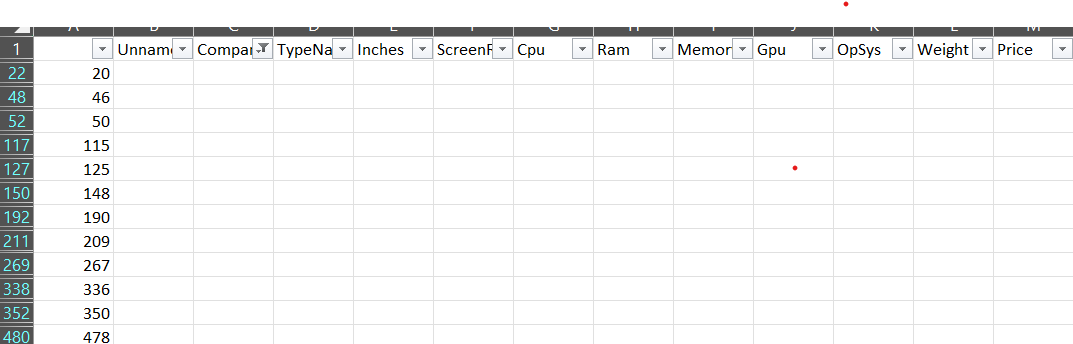


In [13]:
#dropping the missing values
df.dropna(inplace=True)

In [14]:
#Checking the missing values again
df.isnull().sum()

#note-No missing Value

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 119.3+ KB


**Few observation**
 - Inches should be in numerical format rather than object
 
 - Ram is in object as there is GB attached to it need to change the dtype of it as well
 
 - Weight is also in object format need to change it into numerical format

In [16]:
#Checking duplicate rows if any
df.duplicated().sum()

29

In [17]:
#Since there are duplicates present in the dataset.hence dropping them
df = df.drop_duplicates()

In [18]:
df.shape

(1244, 11)

In [19]:
#Checking the count of Ram
df["Ram"].value_counts()

8GB     595
4GB     358
16GB    192
6GB      34
12GB     25
32GB     17
2GB      16
64GB      3
24GB      3
1GB       1
Name: Ram, dtype: int64

# Handling Missing Values And Some Feature Engineering

In [20]:
#Now we are extracting only the numerical part of the Ram from GB
df["Ram"]=df["Ram"].str.replace("GB"," ")

In [21]:
#Changing the Type of Ram into integer 
df["Ram"]=df["Ram"].astype("int32")

In [22]:
#Changing the weight type and format
df["Weight"]=df["Weight"].str.replace("kg"," ")

In [23]:
#Since weight is in object format and there is one anamoly in weight i.e= "?" with index number 208 hence using the internet filling up the information
#as per the research the weight i got = 1.23KG


In [24]:
#Putting the value into that column
df["Weight"][208]=1.23

C:\Users\ricky\AppData\Local\Temp\ipykernel_12648\1775167481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Weight"][208]=1.23


In [25]:
#Chaning the dtype of weight
df["Weight"]=df["Weight"].astype("float32")

In [26]:
#checking for the row having this value(?)
df[df["Inches"]=="?"]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
476,Dell,Workstation,?,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78,128298.24


In [27]:
#Checking the data type of Inches
df["Inches"].dtypes


dtype('O')

**Since the data type of Inches is in object format hence just like the Weight i will fill the value using some research over the internet as mode will not be helpful for the given scenario as different laptops may have different inches**

In [28]:
#Here i have taken "15.6" for filling the value
df["Inches"][476]=15.6

C:\Users\ricky\AppData\Local\Temp\ipykernel_12648\3964112926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Inches"][476]=15.6


In [29]:
#Now we need to change the data type of inches as it should be in numerical format
df["Inches"]=df["Inches"].astype("float32")

In [30]:
df[df["Memory"]=="?"]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
770,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,?,AMD Radeon R7 M445,Windows 10,2.3,62938.0656


**After checking online, it was found that the memory configuration for the Dell notebook with an AMD processor includes a 256GB SSD.**

In [31]:
#Hence filling up the memory
df["Memory"][770]="256GB SSD"

C:\Users\ricky\AppData\Local\Temp\ipykernel_12648\4147972466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Memory"][770]="256GB SSD"


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   float32
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   int32  
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   float32
 10  Price             1244 non-null   float64
dtypes: float32(2), float64(1), int32(1), object(7)
memory usage: 134.3+ KB


# Data Exploration (EDA)

C:\Users\ricky\AppData\Local\Temp\ipykernel_12648\1993102181.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"],color="red")


<AxesSubplot: xlabel='Price', ylabel='Density'>

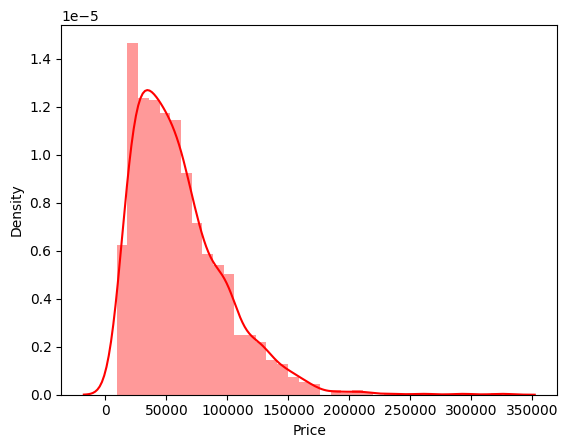

In [33]:

#checking the distribution of price
sns.distplot(df["Price"],color="red")


**From the above the diagram we can see that the Price is rightly skewed as there are many laptops available within a budget range starting from 10000- 150000 and more ,hence we can say that it can be rightly skewed**

In [34]:
#Checking the Number of comapnies producing how many laptops
df["Company"].value_counts()

Lenovo       282
Dell         281
HP           260
Asus         149
Acer         101
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: Company, dtype: int64

<AxesSubplot: >

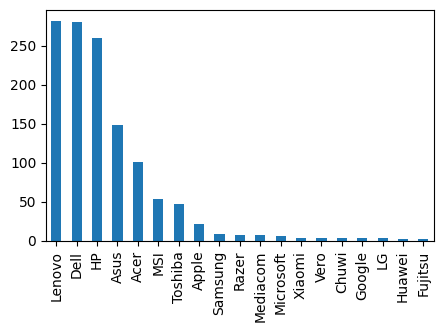

In [35]:
#Graphical Representation of the number of compaines with their number of laptops

plt.figure(figsize=(5,3))
df["Company"].value_counts().plot(kind="bar")

**Observation:**

**The top 5 companies having more number of laptops**

    Lenovo       282
    Dell         281
    HP           260
    Asus         149
    Acer         101

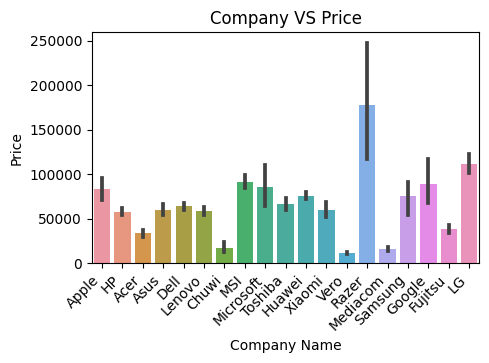

In [36]:
#Lets compare the laptop with their price range
plt.figure(figsize=(5,3))
sns.barplot(data=df,x=df["Company"],y=df["Price"])
plt.xlabel("Company Name")
plt.ylabel("Price")
plt.title("Company VS Price")
plt.xticks(rotation=45,ha="right")
plt.show()

**Observation-**

Based on the graphical representation, it appears that there is a correlation between the price of laptops and the companies that produce them. Companies such as Lenovo, Dell, HP, Asus, and Acer, which provide a higher number of laptops, tend to offer laptops at moderate prices. On the other hand, companies like Razer, LG, and Google, which produce fewer laptops, tend to have higher-priced products. In particular, Razer laptops seem to be among the highest-priced ones, possibly due to their focus on high-end gaming laptops. This correlation suggests that the pricing strategy of laptop manufacturers may be influenced by factors such as brand positioning, target market, and product features.

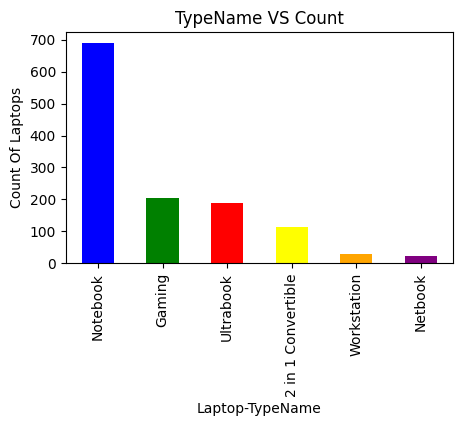

In [37]:
#Now Lets Explore TypeName Column
plt.figure(figsize=(5,3))
df["TypeName"].value_counts().plot(kind="bar",color=['blue', 'green', 'red', 'yellow', 'orange', 'purple'])
plt.xlabel("Laptop-TypeName")
plt.ylabel("Count Of Laptops")
plt.title("TypeName VS Count")
plt.show()

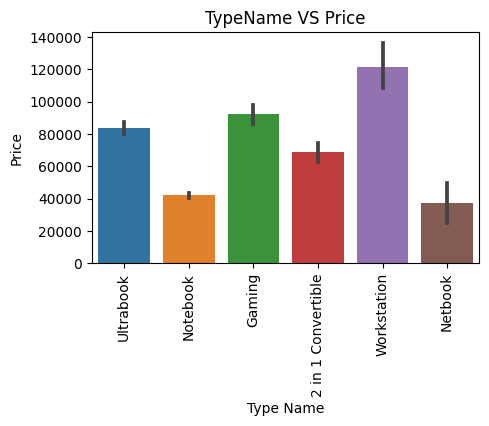

In [38]:
#Lets compare the Laptop Typename with their price range
plt.figure(figsize=(5,3))
sns.barplot(data=df,x=df["TypeName"],y=df["Price"])
plt.xlabel("Type Name")
plt.ylabel("Price")
plt.title("TypeName VS Price")
plt.xticks(rotation="vertical")
plt.show()

**Observation:**

Workstations typically cater to professionals in fields such as engineering, architecture, and content creation, requiring powerful hardware specifications for demanding tasks like 3D modeling, video editing, and CAD work. As a result, workstations often command higher prices due to their specialized components and performance capabilities.

Gaming laptops also tend to be priced higher than average due to their emphasis on graphics performance, high refresh rates, and other features tailored for gaming enthusiasts. These laptops often incorporate dedicated graphics cards, advanced cooling systems, and customizable RGB lighting, contributing to their higher cost.

Ultrabooks, known for their thin and lightweight design along with premium features such as long battery life, fast SSD storage, and high-resolution displays, also command higher prices compared to traditional laptops.

On the other hand, netbooks and budget notebooks are designed to be affordable and cater to students, casual users, and office workers who prioritize affordability and basic functionality over high performance and premium features. Consequently, these laptops tend to have lower prices due to their simpler specifications and cost-effective components.

<AxesSubplot: xlabel='Inches', ylabel='Count'>

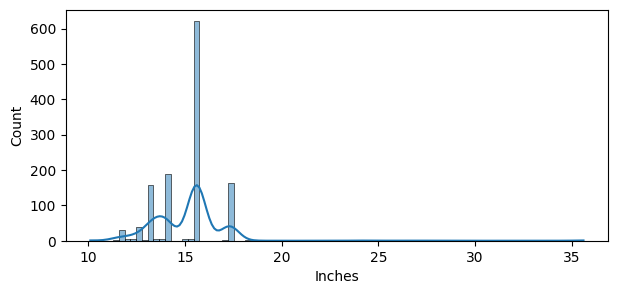

In [39]:
#Lets Explore Inches column Graphically 
plt.figure(figsize=(7,3))
sns.histplot(df["Inches"],kde=True)

<AxesSubplot: xlabel='Inches', ylabel='Price'>

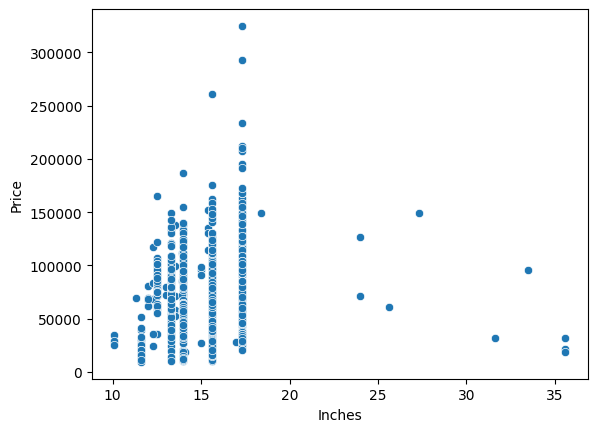

In [40]:
#Correlation of inches with price using scatter plot
sns.scatterplot(x=df["Inches"],y=df["Price"])

**Observation:**

While there can be a relationship between laptop prices and screen size (in inches), it's not always a direct or strong correlation. The price of a laptop is influenced by multiple factors including brand, specifications, build quality, features, and market demand. In the diagram, it's noticeable that laptops with screen sizes ranging from 15 to 17 inches tend to have higher prices. However, to better understand pricing trends, it's essential to consider other factors such as brand reputation, specific specifications (like processor, RAM, storage), build materials, and additional features like touchscreen capability or convertible designs. These elements collectively contribute to the overall value proposition and pricing of laptops, highlighting the need to examine multiple factors for a comprehensive understanding of price dynamics in the laptop market.



# Feature Engineering

In [41]:
#Exploring Screen resolution Column
df["ScreenResolution"].value_counts()

Full HD 1920x1080                                493
1366x768                                         255
IPS Panel Full HD 1920x1080                      222
IPS Panel Full HD / Touchscreen 1920x1080         50
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Retina Display 2880x1800            

**Features to be worked on the Screen Resolution column:**

 - Wheather a laptop is touch screen or not
 - The resolution of the laptop
 - IPS panel of the laptop

In [42]:
#Applying lambda function to extract Touchscreen or not also making a column out of it
df["Touchscreen"]=df["ScreenResolution"].apply(lambda x:1 if "Touchscreen" in x else 0)

<AxesSubplot: >

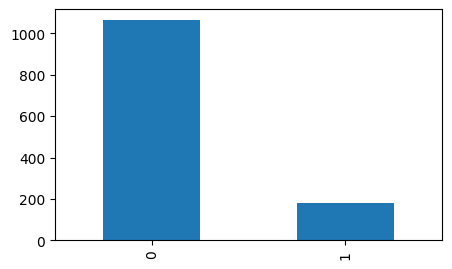

In [43]:
#Graphical representation of the Touchscreen Column
plt.figure(figsize=(5,3))
df["Touchscreen"].value_counts().plot(kind="bar")

#here 0= No Touchscreen and 1=TouchScreen

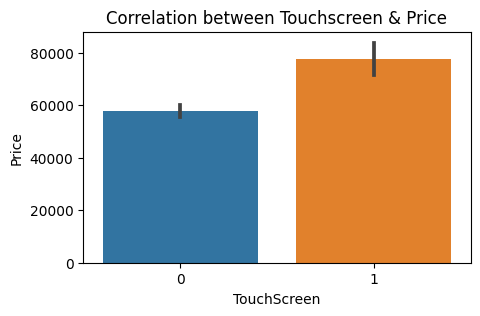

In [44]:
#Correlation of touchscreen with price

plt.figure(figsize=(5,3))
sns.barplot(x=df["Touchscreen"],y=df["Price"])
plt.xlabel("TouchScreen")
plt.ylabel("Price")
plt.title("Correlation between Touchscreen & Price")
plt.show()

**Observation**

The price of laptops with touchscreen facility is more as compared to laptops without touch screen

**Now lets check about the IPS panel in a laptop**

NOTE- An IPS (In-Plane Switching) panel is a screen technology for liquid-crystal displays (LCDs). IPS panels are a type of TFT LCD (Thin Film Transistor Liquid Crystal Display)

In [45]:
#Creating a column for IPS Panel
df["IPS"]=df["ScreenResolution"].apply(lambda x:1 if "IPS Panel" in x else 0)

<AxesSubplot: >

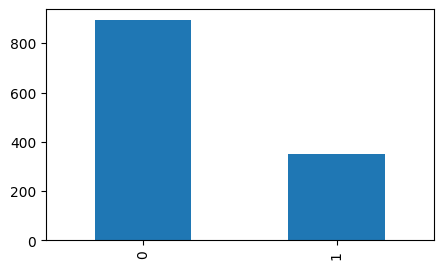

In [46]:
#Graphical representation of IPS Panel

plt.figure(figsize=(5,3))
df["IPS"].value_counts().plot(kind="bar")

#here 0= No IPS PANEL and 1=IPS PANEL

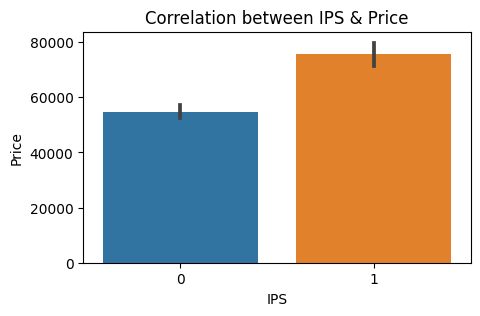

In [47]:
#Correlation of IPS PANEL with price

plt.figure(figsize=(5,3))
sns.barplot(x=df["IPS"],y=df["Price"])
plt.xlabel("IPS")
plt.ylabel("Price")
plt.title("Correlation between IPS & Price")
plt.show()

**Observation**

Those laptops which have IPS Panel are tend to be more expensive than others

In [48]:
#Now we will be extracting the resolution from the Screenresolution column and will make 2 cols-X_RESOLUTION AND Y_RESOLUTION
new = df["ScreenResolution"].str.split("x",expand=True)

In [49]:
df["X_reso"]=new[0]
df["Y_reso"]=new[1]

In [50]:
#Extracting the numerical information of the resolution

df["X_reso"]=df["X_reso"].str.replace(",","").str.findall(r"(\d+\.?\d+)").apply(lambda x:x[0])

In [51]:
#Changing the data type of X_reso and Y_reso
df["X_reso"]=df["X_reso"].astype("int32")
df["Y_reso"]=df["Y_reso"].astype("int32")

In [52]:
#Lets check the correlation of all the features with price
df.corr()["Price"]

C:\Users\ricky\AppData\Local\Temp\ipykernel_12648\2656328315.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Price"]


Inches         0.042767
Ram            0.681922
Weight         0.175898
Price          1.000000
Touchscreen    0.186393
IPS            0.252956
X_reso         0.553040
Y_reso         0.549308
Name: Price, dtype: float64

**Heatmap - Correlation between all features**

C:\Users\ricky\AppData\Local\Temp\ipykernel_12648\1203390196.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='plasma')


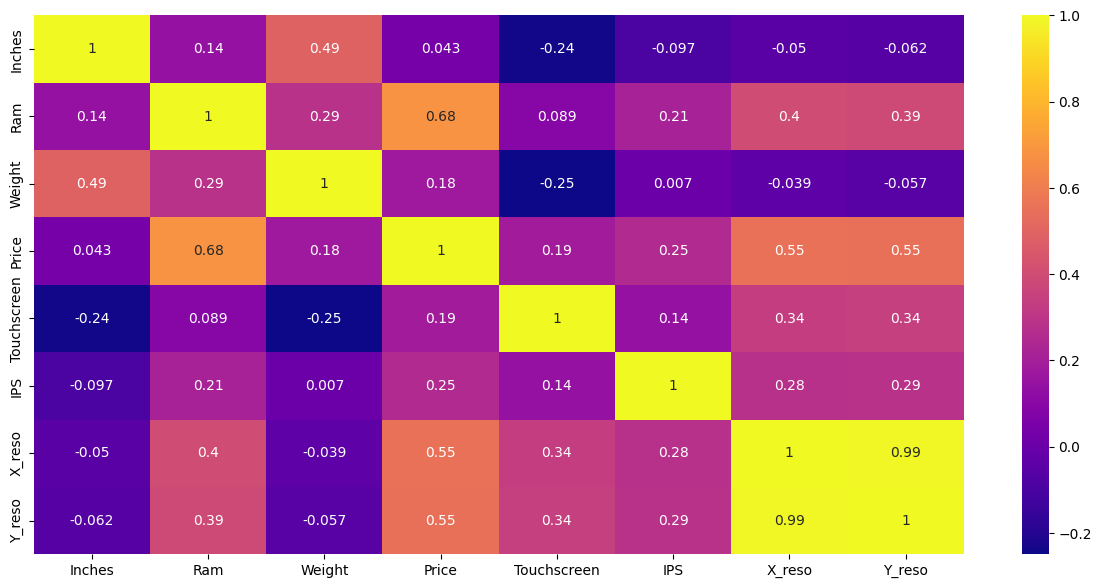

In [53]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='plasma')
plt.show()

**Since Inches plays an important role in price determination of the laptops hence will be making a new column as PPI to have a correlation with the inches,pixels and price**

# What is PPI
PPI is a measure of pixel density or resolution of a computer screen, television screen or other display device

Calculation of PPI is as follows


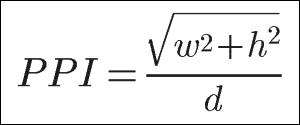

In [54]:
df["PPI"]=(((df["X_reso"]**2) + (df["Y_reso"]**2))**0.5/df["Inches"])

**Heatmap - After adding PPI**

C:\Users\ricky\AppData\Local\Temp\ipykernel_12648\1203390196.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='plasma')


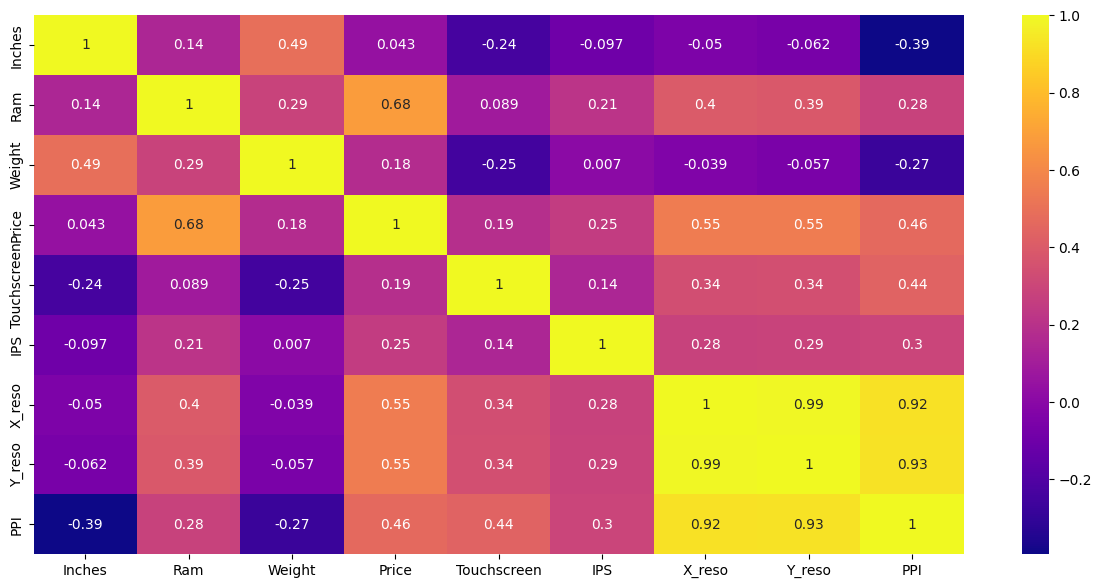

In [55]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='plasma')
plt.show()

In [56]:
#Since we have PPI column hence we can drop ScreenResolution","Inches","X_reso","Y_reso"
df.drop(columns=["ScreenResolution","Inches","X_reso","Y_reso"],inplace=True)

In [57]:
#Now we will be working with the cpu column
df["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     126
Intel Core i7 8550U 1.8GHz      72
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 6440HQ 2.6GHz      1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD A9-Series 9410 2.9GHz        1
Name: Cpu, Length: 118, dtype: int64

In [58]:
#Extracting the important part of the CPU
df["Cpu_name"]=df["Cpu"].apply(lambda x:" ".join(x.split()[:3]))

In [59]:
#df.sample(2)

In [60]:
#function to fetch the type of processor in the CPU
def fetch_processor(text):
    if text == "Intel Core i5" or text== "Intel Core i7" or text == "Intel Core i3":
        return text
    elif text.split()[0]=="Intel":
        return "Other Intel Processor"
    else:
        return "AMD Processor"
        
            

In [61]:
df["Cpu_BrandName"]=df["Cpu_name"].apply(fetch_processor)

In [62]:
df["Cpu_BrandName"].value_counts()

Intel Core i7            503
Intel Core i5            410
Other Intel Processor    138
Intel Core i3            132
AMD Processor             61
Name: Cpu_BrandName, dtype: int64

<AxesSubplot: >

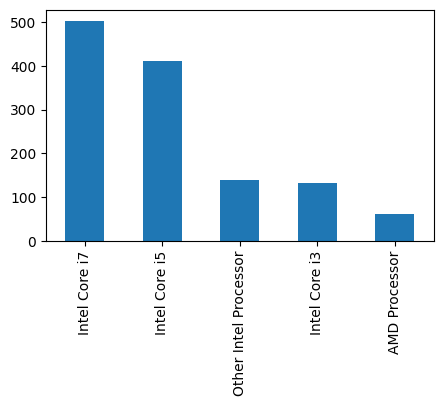

In [63]:
#Graphical representation of Cpu_BrandName

plt.figure(figsize=(5,3))
df["Cpu_BrandName"].value_counts().plot(kind="bar")

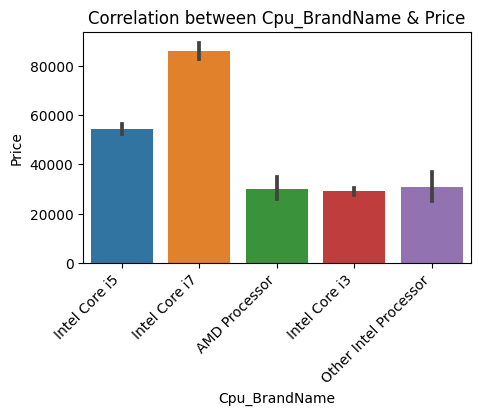

In [64]:
#Correlation of Cpu_BrandName with price

plt.figure(figsize=(5,3))
sns.barplot(x=df["Cpu_BrandName"],y=df["Price"])
plt.xlabel("Cpu_BrandName")
plt.ylabel("Price")
plt.title("Correlation between Cpu_BrandName & Price")
plt.xticks(rotation=45,ha="right")
plt.show()


**Observation:**

The observation suggests that laptops equipped with Intel Core i7 processors tend to have significantly higher prices compared to laptops with other processor types. This price disparity likely reflects the premium positioning of Intel Core i7 processors in the market. Intel Core i7 processors are known for their high performance, advanced features, and capability to handle demanding tasks such as gaming, content creation, and professional applications. As a result, laptops featuring Intel Core i7 processors often target power users and professionals who require top-tier performance, thereby commanding higher price points. This observation underscores the influence of processor type on laptop pricing and highlights the value proposition associated with Intel Core i7-powered laptops.Hence the price range of these i7 laptops are high starting with the range of 75-80k

In [65]:
#Since we have the required column cpu_brandname hence we will drop Cpu and Cpu_name
df.drop(columns=['Cpu',"Cpu_name"],inplace=True)

In [66]:
#Exploartion of Ram
df["Ram"].value_counts()

8     595
4     358
16    192
6      34
12     25
32     17
2      16
64      3
24      3
1       1
Name: Ram, dtype: int64

<AxesSubplot: >

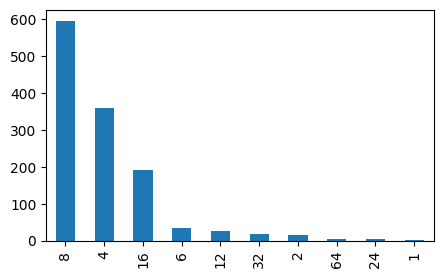

In [67]:
#Graphical Representation of Ram
plt.figure(figsize=(5,3))
df["Ram"].value_counts().plot(kind="bar")

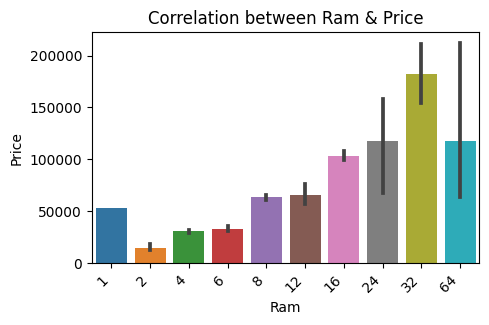

In [68]:
#Correlation of Ram with Price

plt.figure(figsize=(5,3))
sns.barplot(x=df["Ram"],y=df["Price"])
plt.xlabel("Ram")
plt.ylabel("Price")
plt.title("Correlation between Ram & Price")
plt.xticks(rotation=45,ha="right")
plt.show()


**Observation:**

A clear linear relationship emerges between the amount of RAM and the price of laptops. As RAM capacity increases, so does the price of the laptop, suggesting a proportional correlation. 

RAM plays a crucial role in a laptop's performance, enabling smoother multitasking and efficient handling of resource-intensive tasks. Consequently, laptops with larger RAM capacities are favored by users engaging in demanding activities such as gaming, content creation, and data processing. 

Manufacturers offer a range of RAM options to cater to diverse user needs, with higher RAM configurations commanding higher prices due to increased hardware costs. 

This observation underscores the significance of RAM in determining laptop pricing and its pivotal role in ensuring optimal computing experiences for users across various usage scenarios.

In [69]:
#Exploring Memory Column

df["Memory"].value_counts()

256GB SSD                        402
1TB HDD                          209
500GB HDD                        121
512GB SSD                        112
128GB SSD +  1TB HDD              92
128GB SSD                         72
256GB SSD +  1TB HDD              71
32GB Flash Storage                35
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           13
64GB Flash Storage                12
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
128GB Flash Storage                4
180GB SSD                          4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

**In here, we will do as follows,**
* **Four most common variants observed: HDD, SSD, Flash, Hybrid**
* **Removing the decimal space for example 1.0 TB will become 1TB**
* **We will replace the word GB with ""**
* **We will replace the word TB with "000"**
* **We will split the word across the "+" character**

In [70]:
df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex = True)
df['Memory'] = df['Memory'].str.replace('GB','')
df['Memory'] = df['Memory'].str.replace('TB','000')
newdf = df['Memory'].str.split("+",n = 1,expand = True)
newdf

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1269,500 HDD,None
1270,128 SSD,None
1271,512 SSD,None
1272,64 Flash Storage,None


**We will strip up all the white spaces, basically eliminating white spaces**

In [71]:
df['first'] = newdf[0]
df['first'] = df['first'].str.strip()
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_BrandName,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,256 SSD


**Creating Layer 1 column for each memory type**

In [72]:
def applychanges(value):
    
    df['Layer1'+value] = df['first'].apply(lambda x:1 if value in x else 0)
    
    
listtoapply = ['HDD','SSD','Hybrid','FlashStorage']    
for value in listtoapply:
    applychanges(value)
    
    
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_BrandName,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,128 Flash Storage,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,256 SSD,0,1,0,0


**We will remove all the character and just keeping the numbers**

In [73]:
df['first'] = df['first'].str.replace(r'\D','')
df['first'].value_counts()

C:\Users\ricky\AppData\Local\Temp\ipykernel_12648\3415303436.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D','')


256     496
1000    233
128     171
512     134
500     121
32       42
2000     16
64       14
16       10
180       4
240       1
8         1
508       1
Name: first, dtype: int64

In [74]:
df['Second'] = newdf[1]
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_BrandName,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,128,0,1,0,0,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,128,0,0,0,0,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,256,0,1,0,0,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,512,0,1,0,0,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,256,0,1,0,0,None


**Creating Layer 2 column for each memory type**

In [75]:
def applychanges1(value):
    
    df['Layer2'+value] = df['Second'].apply(lambda x:1 if value in x else 0)
    
    
listtoapply1 = ['HDD','SSD','Hybrid','FlashStorage']
df['Second'] = df['Second'].fillna("0")
for value in listtoapply1:
    applychanges1(value)

**We will remove all the characters and just keeping the numbers again**

In [76]:
df['Second'] = df['Second'].str.replace(r'\D','')
df['Second'].value_counts()

C:\Users\ricky\AppData\Local\Temp\ipykernel_12648\3199994234.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Second'] = df['Second'].str.replace(r'\D','')


0       1040
1000     183
2000      15
256        3
500        2
512        1
Name: Second, dtype: int64

In [77]:
df['first'] = df['first'].astype('int')
df['Second'] = df['Second'].astype('int')
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,...,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,1,0,0,0,0,0,0,0


# **Multiplying the elements and storing in subsequent columns**

In [78]:
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["Second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["Second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["Second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1FlashStorage"]+df["Second"]*df["Layer2FlashStorage"])

**Dropping unecessary columns**

In [79]:
df.drop(columns=['first', 'Second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1FlashStorage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2FlashStorage'],inplace=True)

In [80]:
df.sample(3)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_BrandName,HDD,SSD,Hybrid,Flash_Storage
834,Lenovo,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.32,87912.00,0,1,157.350512,Intel Core i5,0,256,0,0
956,Dell,2 in 1 Convertible,8,256 SSD,Intel HD Graphics 615,Windows 10,1.24,101178.72,1,0,165.632116,Intel Core i5,0,256,0,0
23,Dell,2 in 1 Convertible,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.62,43636.32,1,0,165.632116,Intel Core i5,0,256,0,0


In [81]:
#Dropping the memory column
df.drop(columns=['Memory'],inplace=True)
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_BrandName,HDD,SSD,Hybrid,Flash_Storage
967,HP,Notebook,4,Intel HD Graphics 620,Windows 10,2.04,36496.8000,0,0,141.211995,Intel Core i3,500,0,0,0
1044,HP,Notebook,4,Intel HD Graphics 520,Windows 10,1.54,53280.0000,0,0,157.350512,Intel Core i5,500,0,0,0
381,Lenovo,Notebook,4,Intel HD Graphics 520,No OS,1.85,21498.4800,0,0,141.211995,Intel Core i3,0,128,0,0
548,HP,Notebook,4,Intel HD Graphics 520,Windows 10,1.86,21152.1600,0,0,141.211995,Intel Core i3,500,0,0,0
748,Dell,Notebook,8,Intel HD Graphics 620,Windows 10,1.60,60031.1088,0,0,111.935204,Intel Core i5,0,256,0,0


C:\Users\ricky\AppData\Local\Temp\ipykernel_12648\218908939.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="plasma")


<AxesSubplot: >

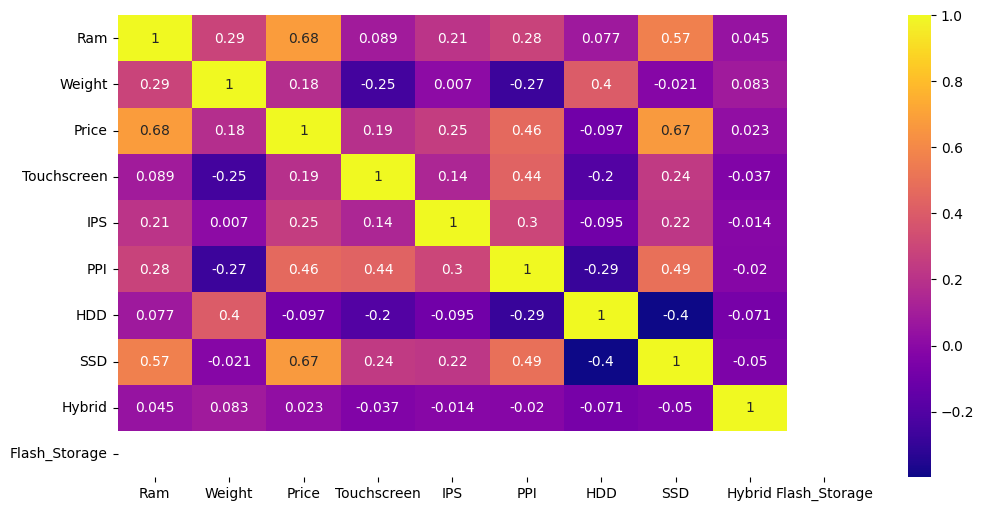

In [82]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap="plasma")

In [83]:
df.corr()["Price"]

C:\Users\ricky\AppData\Local\Temp\ipykernel_12648\1734695575.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Price"]


Ram              0.681922
Weight           0.175898
Price            1.000000
Touchscreen      0.186393
IPS              0.252956
PPI              0.464694
HDD             -0.097017
SSD              0.667828
Hybrid           0.022505
Flash_Storage         NaN
Name: Price, dtype: float64

**Based on the correlation we observe that `Hybrid` and `Flash Storage` are almost negligible,so we can simply drop them off,where as HDD and SDD are having good correlation,we find that HDD has -ve relation with Price,and that's true,if the price of laptop is increasing there is more probability that the laptop is gonna use SDD instead of HDD and vice versa as well**

In [84]:
#hence dropping Hybrid,Flash_Storage
df.drop(columns = ['Hybrid','Flash_Storage'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_BrandName,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,0,256


In [85]:
#Analysing the GPU Column

In [86]:
df["Gpu"].value_counts()

Intel HD Graphics 620      269
Intel HD Graphics 520      177
Intel UHD Graphics 620      66
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

**Since there are many Values in the Gpu which are appearing only once hence just extracting the first name of the GPU**

In [87]:
#Extraction
df["Gpu_brandName"]=df["Gpu"].apply(lambda x:x.split()[0])

In [88]:
#Getting the unique counts of the Gpu
df["Gpu_brandName"].value_counts()

Intel     684
Nvidia    389
AMD       170
ARM         1
Name: Gpu_brandName, dtype: int64

In [89]:
#Since we have only one ARM Gpu processor hence dropping it so that we can have 3 unique values
df= df[df["Gpu_brandName"]!="ARM"]

In [90]:
df.shape

(1243, 14)

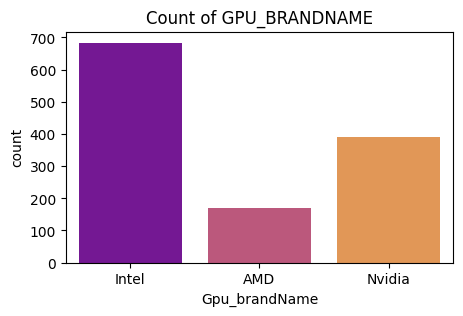

In [91]:
#Now lets see the value_counts graphically
plt.figure(figsize=(5,3))
sns.countplot(x=df["Gpu_brandName"],palette="plasma")
plt.title("Count of GPU_BRANDNAME")
plt.show()

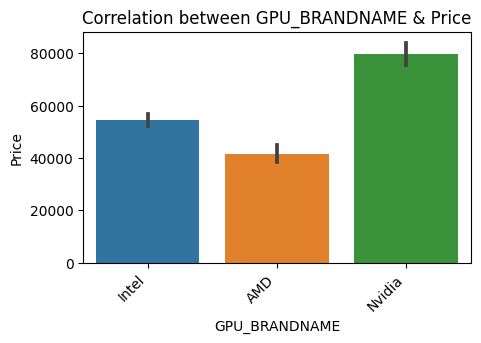

In [92]:
#Correlation of GPU with Price

plt.figure(figsize=(5,3))
sns.barplot(x=df["Gpu_brandName"],y=df["Price"])
plt.xlabel("GPU_BRANDNAME")
plt.ylabel("Price")
plt.title("Correlation between GPU_BRANDNAME & Price")
plt.xticks(rotation=45,ha="right")
plt.show()


**Observation:**

Nvidia GPUs tend to be more expensive compared to their counterparts from other manufacturers. The premium pricing of Nvidia GPUs is often attributed to their advanced graphics performance, optimized drivers, and widespread adoption in high-end gaming and professional applications.**

On the other hand, AMD processors generally offer competitive performance at a relatively lower price point compared to Intel processors. This price difference is often appealing to budget-conscious consumers and makes AMD processors an attractive option for those seeking value-oriented computing solutions without compromising on performance.**

These observations highlight the pricing dynamics within the GPU and processor markets, where Nvidia GPUs command a premium for their performance and features, while AMD processors offer a compelling balance of performance and affordability compared to Intel counterparts.

In [93]:
#Dropping column Gpu
df.drop(columns=["Gpu"],inplace=True)

In [94]:
df.head(2)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_BrandName,HDD,SSD,Gpu_brandName
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0,Intel


In [95]:
#Exploring OpSys
df["OpSys"].value_counts()

Windows 10      1022
No OS             63
Linux             57
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: OpSys, dtype: int64

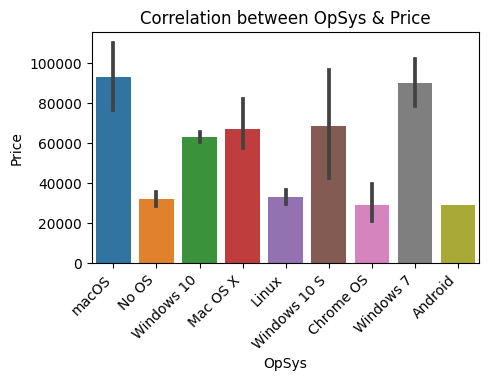

In [96]:
#Correlation of OpSys with Price

plt.figure(figsize=(5,3))
sns.barplot(x=df["OpSys"],y=df["Price"])
plt.xlabel("OpSys")
plt.ylabel("Price")
plt.title("Correlation between OpSys & Price")
plt.xticks(rotation=45,ha="right")
plt.show()

**We can see that there are many versions of one type of OS, espicially for Windows and macOS. So we can club them together like,**
* **{Windows 10,Windows 7,Windows 10 S}-->Windows**
* **{macOS,mac OS X}--> mac**
* **others --> Other/No OS/Linux**

In [97]:
#Creating a function for windows,mac and other operating systems
def cat_os(os):
    
    if os=='Windows 10' or os=='Windows 7' or os=='Windows 10 S':
        return 'Windows'
    
    elif os=='Mac OS X' or os=='macOS':
        return 'Mac'
    
    else:
        return 'Other/No OS/Linux'
    
    
df['OpSys'] = df['OpSys'].apply(lambda x:cat_os(x))

df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_BrandName,HDD,SSD,Gpu_brandName
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other/No OS/Linux,1.86,30636.0000,0,0,141.211995,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534629,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983001,Intel Core i5,0,256,Intel


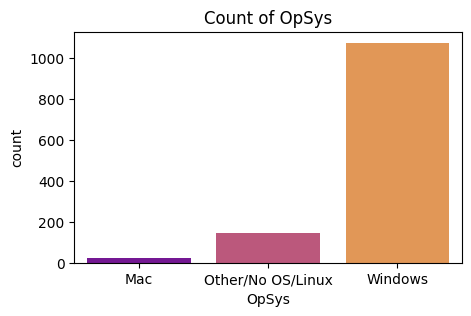

In [98]:
#Graphical representation of the count of operating system
plt.figure(figsize=(5,3))
sns.countplot(x=df["OpSys"],palette="plasma")
plt.title("Count of OpSys")
plt.show()

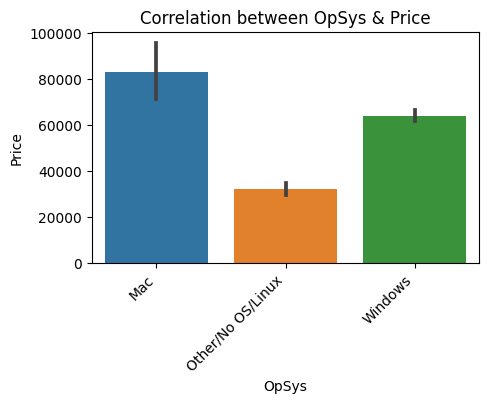

In [99]:
#Correlation of OpSys with Price

plt.figure(figsize=(5,3))
sns.barplot(x=df["OpSys"],y=df["Price"])
plt.xlabel("OpSys")
plt.ylabel("Price")
plt.title("Correlation between OpSys & Price")
plt.xticks(rotation=45,ha="right")
plt.show()


**Observation:**

MacOS ranks as the most expensive operating system, closely followed by Windows, which enjoys widespread preference among users for its versatility and compatibility. Linux and other operating systems hold smaller market shares, appealing to niche user groups with specialized needs due to factors such as open-source flexibility and robust security features.

**Now Lets Explore the operating system using some hypothesis testing**

# Hypothesis Testing
Hypothesis testing is a tool for making statistical inferences about the population data. It is an analysis tool that tests assumptions and determines how likely something is within a given standard of accuracy. Hypothesis testing provides a way to verify whether the results of an experiment are valid.

There are two type of hypothesis
 - Null Hypothesis-The null hypothesis is a statement or claim that is being tested for disproval. 
 - Alternative Hypothesis-The alternative hypothesis is the hypothesis that is being tested for proof
 
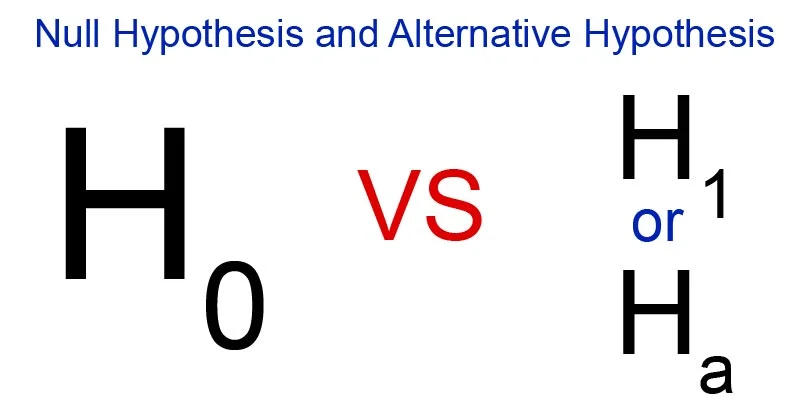

In [100]:
#Lets do some hypothesis testing for the Operating system

from scipy.stats import ttest_ind           #For statistical calculation

# T-Test
A t test is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.

In [101]:
# For t-test we need to define two groups for comparison based on the operating system(here i have taken Mac os and Windows)
group_macos = df[df['OpSys'] == 'Mac']['Price']
group_windows = df[df['OpSys'] == 'Windows']['Price']

# My Assumptions for the Hypothesis for the Operating System-:
Null Hypothesis (H0): The mean price of laptops with macOS operating system is equal to the mean price of laptops with Windows 10 operating system.

Alternative Hypothesis (H1): The mean price of laptops with macOS operating system is not equal to the mean price of laptops with Windows 10 operating system.

In [102]:
# Performing t-test
t_statistic, p_value = ttest_ind(group_macos, group_windows)

In [103]:
# Defining the significance level
alpha = 0.05

In [104]:
# Printing the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 2.31518777819195
P-Value: 0.02078698186355988


In [105]:
# Comparing the p-value with significance level
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in mean prices.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in mean prices.")

Reject null hypothesis: There is a significant difference in mean prices.


**Reasons for -There is a significant difference in mean prices.**

Brand Positioning- Windows laptops are produced by numerous manufacturers, leading to a wider price range. Mac OS laptops, exclusively made by Apple, often command higher prices due to their premium brand image.

Hardware Specifications- Variations in hardware components like processors, RAM, and storage influence manufacturing costs, affecting laptop prices. MacBooks, known for high-quality components, tend to be priced higher compared to Windows laptops with similar specs.

Operating System Costs- Windows laptops may incur additional costs for licensing the operating system, contributing to their pricing. In contrast, Mac OS laptops come with macOS pre-installed, potentially affecting their pricing structure.

These factors collectively contribute to the observed difference in mean prices between Windows and Mac OS laptops in the market.

Text(0.5, 1.0, 'Weight Distribution')

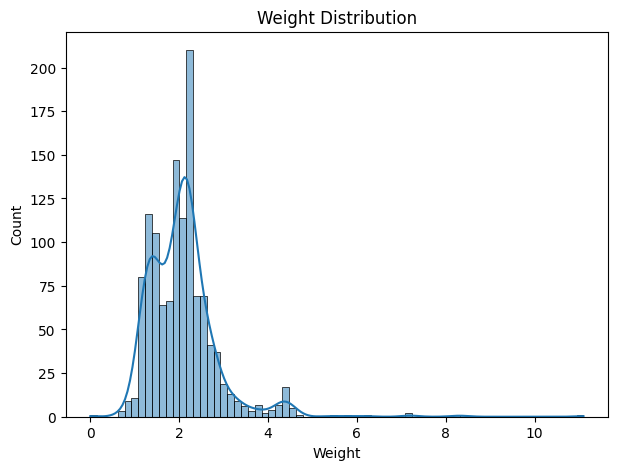

In [106]:
#Exploring Weight column
plt.figure(figsize=(7,5))
sns.histplot(df["Weight"],kde=True)
plt.title("Weight Distribution")

<AxesSubplot: xlabel='Weight', ylabel='Price'>

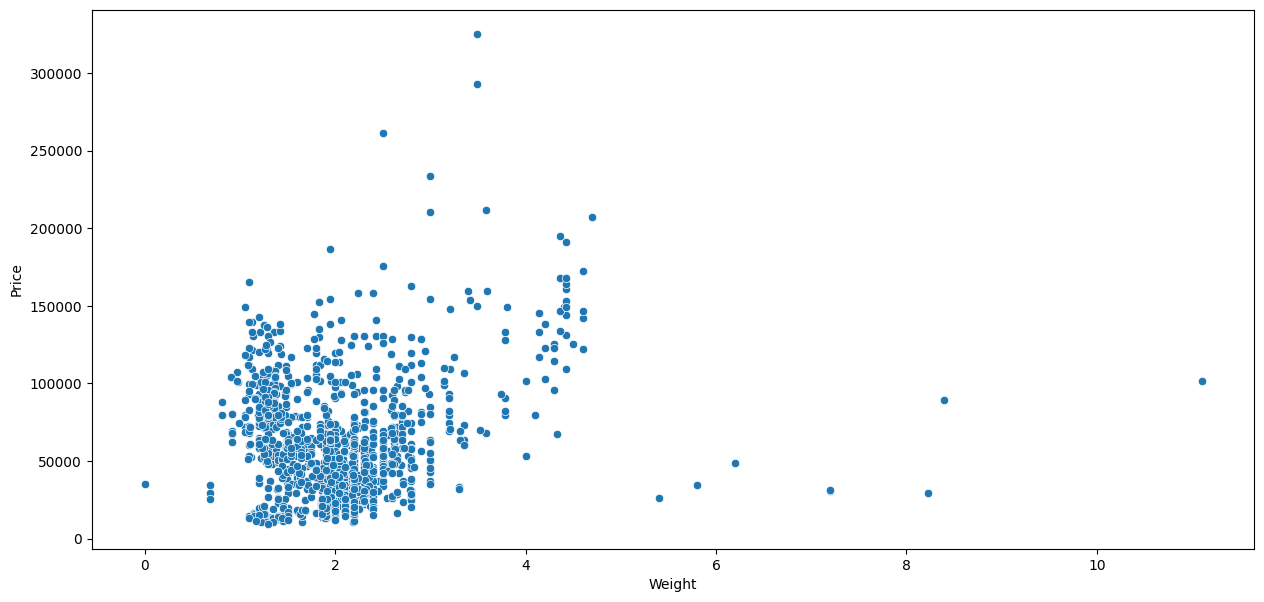

In [107]:
#Checking the relationship with the price
plt.figure(figsize=(15,7))
sns.scatterplot(x=df["Weight"],y=df["Price"])

**Observation:**
    
There is slightly linear realtionship of Weight and the Price which is evident from  the scatter plot

In [108]:
#Lets see the correlation of the Weight and the Price Numerically
df.corr()["Price"]

C:\Users\ricky\AppData\Local\Temp\ipykernel_12648\1153867458.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Price"]


Ram            0.681786
Weight         0.175396
Price          1.000000
Touchscreen    0.188202
IPS            0.254138
PPI            0.466676
HDD           -0.097498
SSD            0.667673
Name: Price, dtype: float64

C:\Users\ricky\AppData\Local\Temp\ipykernel_12648\2201588209.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="viridis")


<AxesSubplot: >

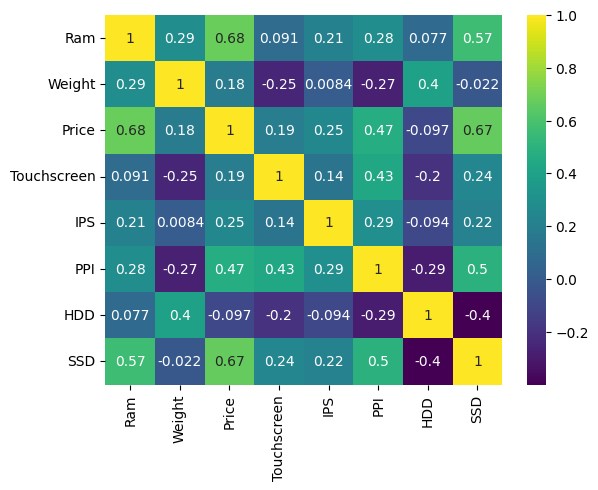

In [109]:
sns.heatmap(df.corr(),annot=True,cmap="viridis")

**Previously we saw that the distribution of the price is rightly skewed hence it may create a problem in predicting the price. Hence we will apply Log transformation so that price is normally distributed**

C:\Users\ricky\AppData\Local\Temp\ipykernel_12648\941010651.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])


<AxesSubplot: xlabel='Price', ylabel='Density'>

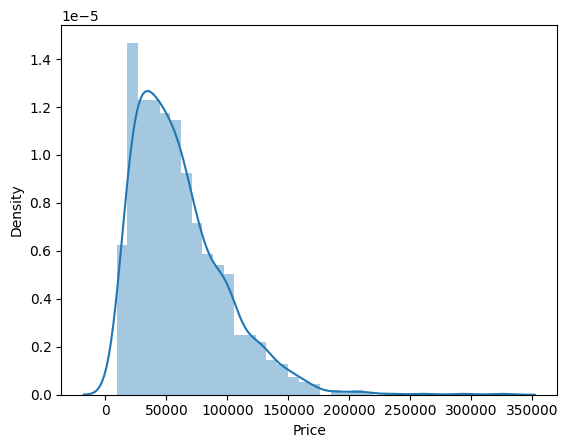

In [110]:
sns.distplot(df["Price"])

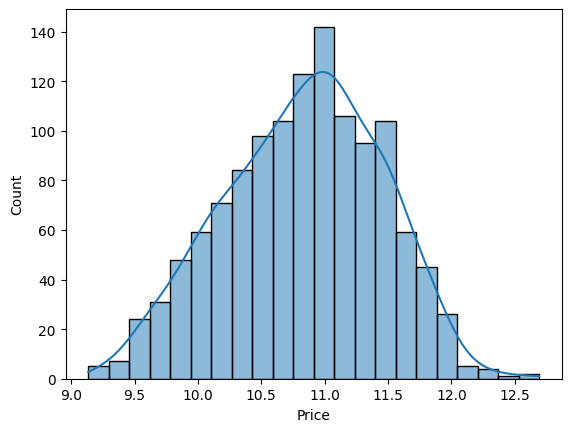

In [111]:
#Normal Distribution of Price using Log
sns.histplot(np.log(df["Price"]),kde=True,)
plt.show()

# BUILDING MODEL

In [112]:
#Splitting the data into X and y
X=df.drop(columns=["Price"])
y=np.log(df["Price"])

In [113]:
X.head(2)

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,PPI,Cpu_BrandName,HDD,SSD,Gpu_brandName
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983001,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677938,Intel Core i5,0,0,Intel


In [114]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1269    10.555257
1270    10.433899
1271    11.288115
1272     9.409283
1273    10.614129
Name: Price, Length: 1243, dtype: float64

# Training - Testing - Splitting

In [115]:
from sklearn.model_selection import train_test_split,GridSearchCV     #for splitting and training the model  and for different parameter tuning
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.15,random_state=2)

# Importing Important Libraries 

In [116]:
from sklearn.compose import ColumnTransformer                                   #for transforming the columns 
from sklearn.pipeline import Pipeline                                           #for the pipeline of the steps to be performed
from sklearn.preprocessing import OneHotEncoder                                 #for changing the categorical values into numerical
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error     #For evalation of the model

# Importing ML Models

In [117]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Linear Regression

Linear regression is a type of supervised machine learning algorithm that computes the linear relationship between a dependent variable and one or more independent features.
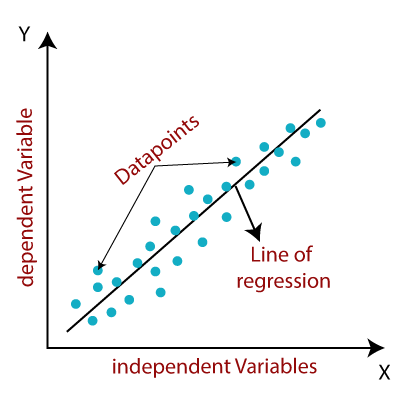

In [118]:
# Steps for encoding the categorical values and then providing an object to the Linear Regression model for prediction
step1= ColumnTransformer([
    ("col_trans",OneHotEncoder(sparse=False,drop="first"),[0,1,3,8,11])]
,remainder="passthrough"
)

step2=LinearRegression()

pipe = Pipeline([
    ("step1",step1),
    ("step2",step2)
])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)

print("R2 Score: ",r2_score(y_test,y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))

R2 Score:  0.6874073483447183
Mean Squared Error:  0.11544283590818379
Mean Absolute Error:  0.2425584630966586


C:\Users\ricky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Ridge Regression

Ridge regression—also known as L2 regularization—is one of several types of regularization for linear regression models. Regularization is a statistical method to reduce errors caused by overfitting on training data. Ridge regression specifically corrects for multicollinearity in regression analysis

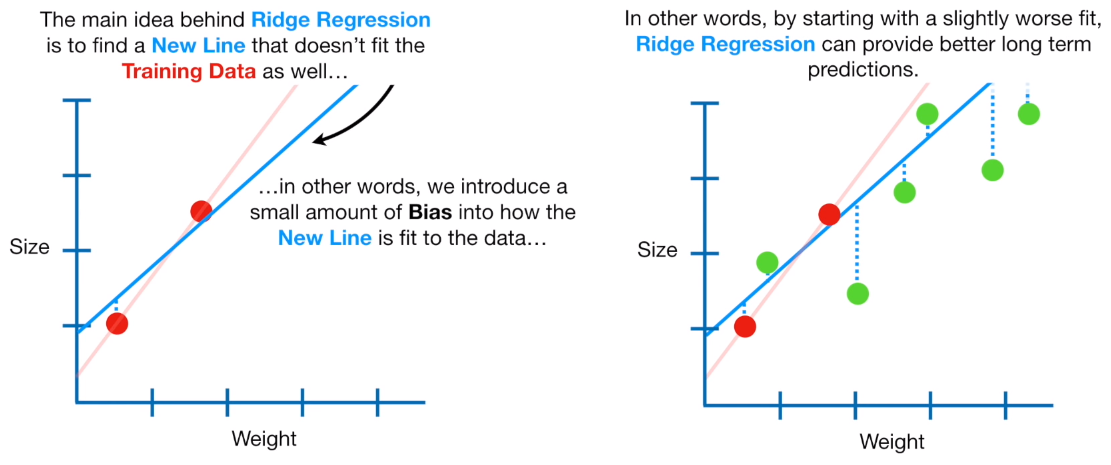

In [119]:
# Steps for encoding the categorical values and then providing an object to the Ridge Regression model for prediction
step1= ColumnTransformer([
    ("col_trans",OneHotEncoder(sparse=False,drop="first"),[0,1,3,8,11])]
,remainder="passthrough"
)

step2=Ridge(alpha=10)

pipe = Pipeline([
    ("step1",step1),
    ("step2",step2)
])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)

print("R2 Score: ",r2_score(y_test,y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))

R2 Score:  0.674932711248059
Mean Squared Error:  0.12004981395369428
Mean Absolute Error:  0.245781896443453


C:\Users\ricky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Lasso Regression

Lasso regression—also known as L1 regularization—is a form of regularization for linear regression models. Regularization is a statistical method to reduce errors caused by overfitting on training data. 

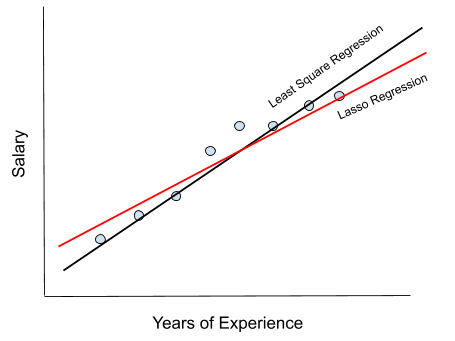

In [120]:
# Steps for encoding the categorical values and then providing an object to the Lasso Regression model for prediction

step1= ColumnTransformer([
    ("col_trans",OneHotEncoder(sparse=False,drop="first"),[0,1,3,8,11])]
,remainder="passthrough"
)

step2=Lasso(alpha=.001)

pipe = Pipeline([
    ("step1",step1),
    ("step2",step2)
])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)

print("R2 Score: ",r2_score(y_test,y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))

R2 Score:  0.6762881436522732
Mean Squared Error:  0.11954924249177488
Mean Absolute Error:  0.2448847440749734


C:\Users\ricky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# KNN

(K-NN) algorithm is a versatile and widely used machine learning algorithm that is primarily used for its simplicity and ease of implementation. It does not require any assumptions about the underlying data distribution. It can also handle both numerical and categorical data, making it a flexible choice for various types of datasets in classification and regression tasks. It is a non-parametric method that makes predictions based on the similarity of data points in a given dataset. K-NN is less sensitive to outliers compared to other algorithms.

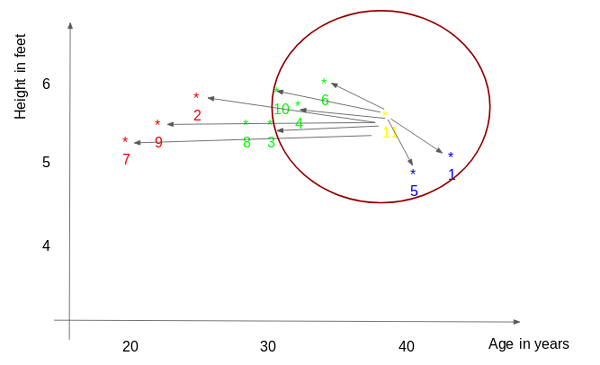

In [121]:
# Steps for encoding the categorical values and then providing an object to the KNN Regression model for prediction
step1= ColumnTransformer([
    ("col_trans",OneHotEncoder(sparse=False,drop="first"),[0,1,3,8,11])]
,remainder="passthrough"
)

step2=KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ("step1",step1),
    ("step2",step2)
])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)

print("R2 Score: ",r2_score(y_test,y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))

C:\Users\ricky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score:  0.7556945690236366
Mean Squared Error:  0.0902238476507255
Mean Absolute Error:  0.23215254329886176


# Decision Tree

A decision tree is one of the most powerful tools of supervised learning algorithms used for both classification and regression tasks. It builds a flowchart-like tree structure where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. It is constructed by recursively splitting the training data into subsets based on the values of the attributes until a stopping criterion is met, such as the maximum depth of the tree or the minimum number of samples required to split a node

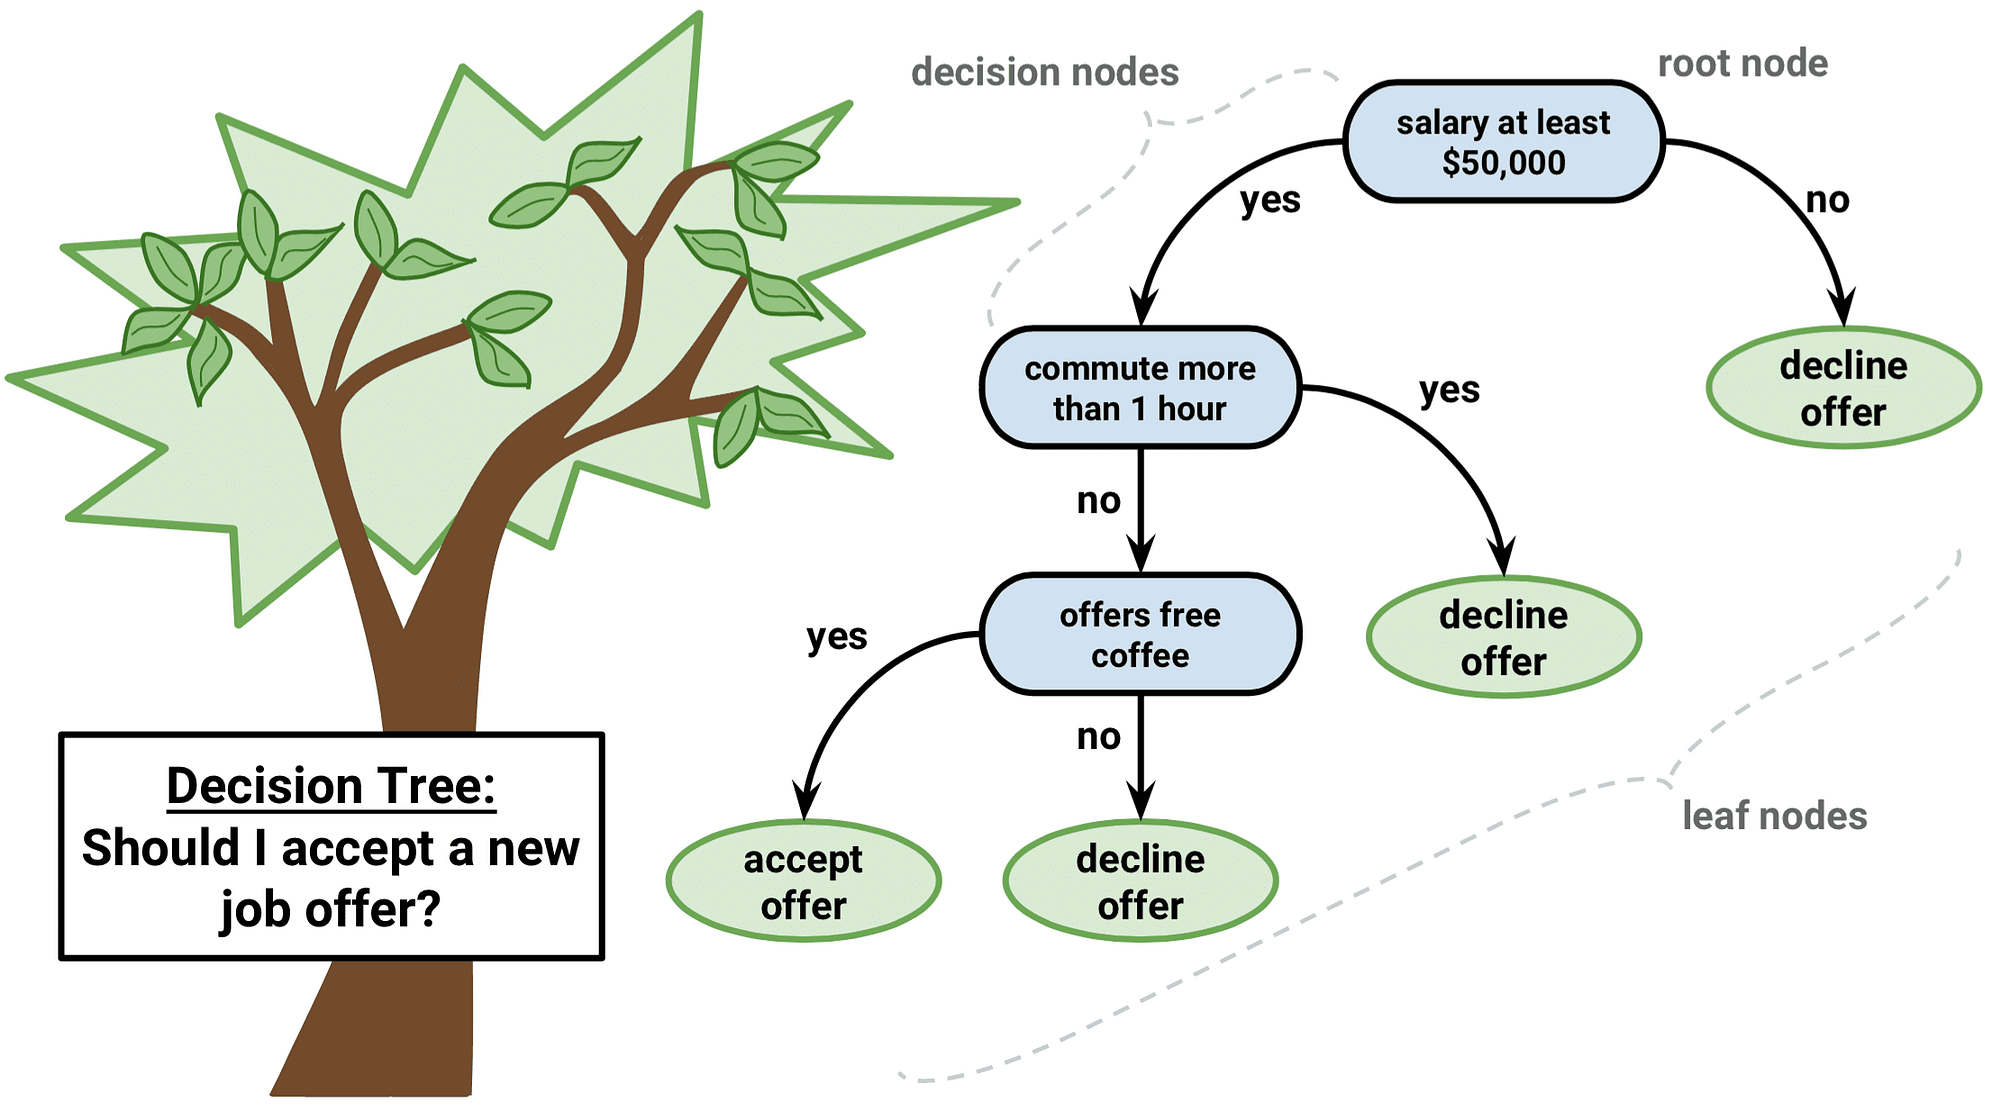

In [122]:
# Steps for encoding the categorical values and then providing an object to the Decision Tree Regression model for prediction
step1= ColumnTransformer([
    ("col_trans",OneHotEncoder(sparse=False,drop="first"),[0,1,3,8,11])]
,remainder="passthrough"
)

# Tried with max_depth(8,10,12,13,15) among which 13 gave the good accurracy
step2=DecisionTreeRegressor(max_depth=13)



pipe = Pipeline([
    ("step1",step1),
    ("step2",step2)
])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)

print("R2 Score: ",r2_score(y_test,y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))

C:\Users\ricky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score:  0.7546604646228856
Mean Squared Error:  0.09060575024509446
Mean Absolute Error:  0.2300923965829757


# SVM

Support Vector Machine (SVM) is a supervised machine learning algorithm used for both classification and regression. Though we say regression problems as well it’s best suited for classification. The main objective of the SVM algorithm is to find the optimal hyperplane in an N-dimensional space that can separate the data points in different classes in the feature space. The hyperplane tries that the margin between the closest points of different classes should be as maximum as possible. The dimension of the hyperplane depends upon the number of features. If the number of input features is two, then the hyperplane is just a line. If the number of input features is three, then the hyperplane becomes a 2-D plane. It becomes difficult to imagine when the number of features exceeds three. 

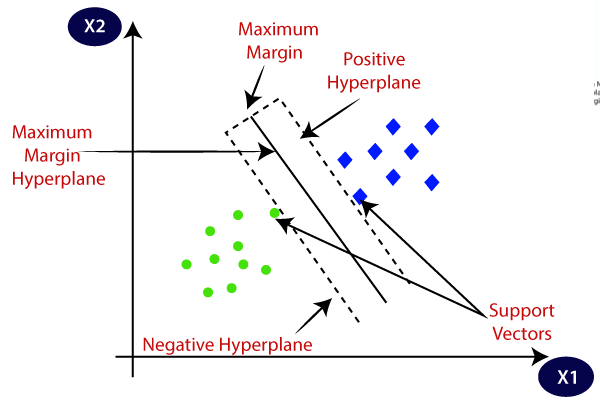

In [123]:
# Steps for encoding the categorical values and then providing an object to the SVM Regression model for prediction

step1= ColumnTransformer([
    ("col_trans",OneHotEncoder(sparse=False,drop="first"),[0,1,3,8,11])]
,remainder="passthrough"
)


step2=SVR(kernel="rbf",C=10000,epsilon=.1)



pipe = Pipeline([
    ("step1",step1),
    ("step2",step2)
])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)


print("R2 Score: ",r2_score(y_test,y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))

C:\Users\ricky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score:  0.6498465982384951
Mean Squared Error:  0.12931430565688018
Mean Absolute Error:  0.2294732241279352


# Random Forest

Random Forest algorithm is a powerful tree learning technique in Machine Learning. It works by creating a number of Decision Trees during the training phase. Each tree is constructed using a random subset of the data set to measure a random subset of features in each partition. This randomness introduces variability among individual trees, reducing the risk of overfitting and improving overall prediction performance. In prediction, the algorithm aggregates the results of all trees, either by voting (for classification tasks) or by averaging (for regression tasks) This collaborative decision-making process, supported by multiple trees with their insights, provides an example stable and precise results. Random forests are widely used for classification and regression functions, which are known for their ability to handle complex data, reduce overfitting, and provide reliable forecasts in different environments.

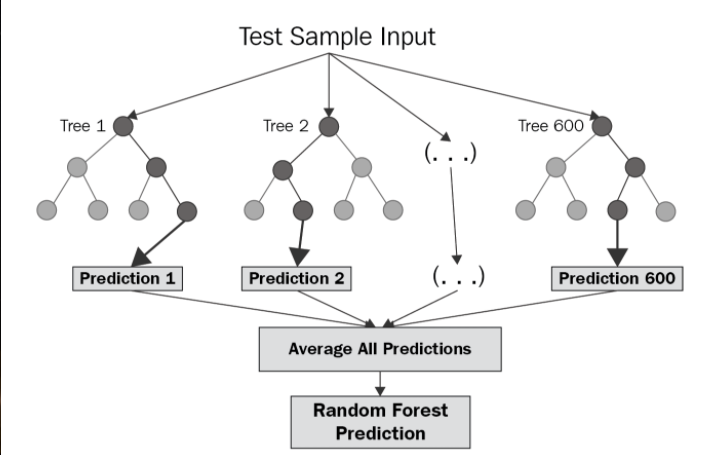

In [124]:
# Steps for encoding the categorical values and then providing an object to the Random Forest Regression model for prediction
step1= ColumnTransformer([
    ("col_trans",OneHotEncoder(sparse=False,drop="first"),[0,1,3,8,11])]
,remainder="passthrough"
)


step2=RandomForestRegressor(n_estimators=200,random_state=3,
                            max_samples=.5,max_features=.75,max_depth=15)


pipe = Pipeline([
    ("step1",step1),
    ("step2",step2)
])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)


print("R2 Score: ",r2_score(y_test,y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))

C:\Users\ricky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score:  0.8302076911401379
Mean Squared Error:  0.06270558679605967
Mean Absolute Error:  0.19335478103116993


# Gradient Boost

Gradient Boosting is a powerful boosting algorithm that combines several weak learners into strong learners, in which each new model is trained to minimize the loss function such as mean squared error or cross-entropy of the previous model using gradient descent. In each iteration, the algorithm computes the gradient of the loss function with respect to the predictions of the current ensemble and then trains a new weak model to minimize this gradient. The predictions of the new model are then added to the ensemble, and the process is repeated until a stopping criterion is met.

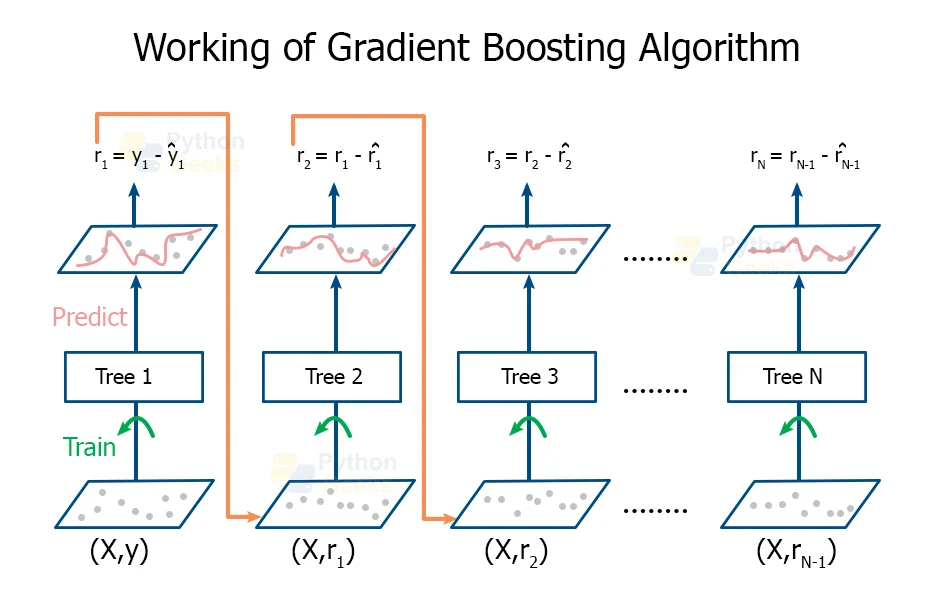

In [125]:
# Steps for encoding the categorical values and then providing an object to the Gradient Boosting Regression model for prediction
step1= ColumnTransformer([
    ("col_trans",OneHotEncoder(sparse=False,drop="first"),[0,1,3,8,11])]
,remainder="passthrough"
)


step2=GradientBoostingRegressor(n_estimators=500)


pipe = Pipeline([
    ("step1",step1),
    ("step2",step2)
])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)


print("R2 Score: ",r2_score(y_test,y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))

C:\Users\ricky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score:  0.8376136113755119
Mean Squared Error:  0.05997052431153207
Mean Absolute Error:  0.18173021611251056


# XG Boost

XGBoost is an optimized distributed gradient boosting library designed for efficient and scalable training of machine learning models. It is an ensemble learning method that combines the predictions of multiple weak models to produce a stronger prediction. XGBoost stands for “Extreme Gradient Boosting” and it has become one of the most popular and widely used machine learning algorithms due to its ability to handle large datasets and its ability to achieve state-of-the-art performance in many machine learning tasks such as classification and regression.


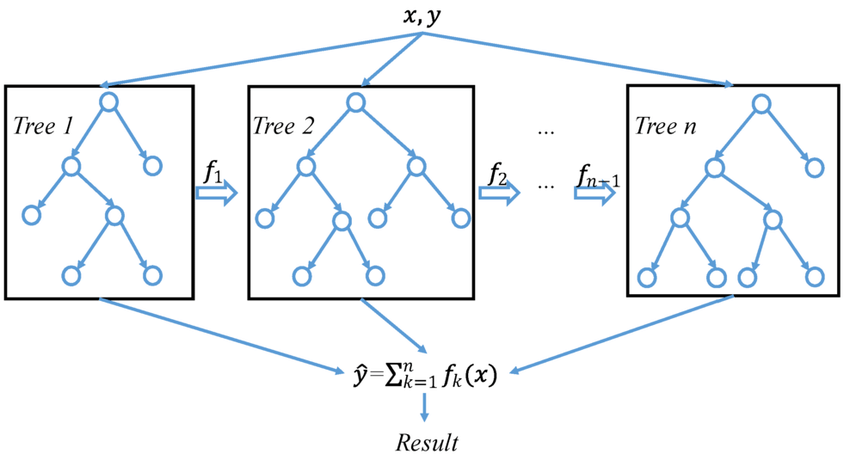

In [126]:
# Steps for encoding the categorical values and then providing an object to the XG BOOST Regression model for prediction
step1= ColumnTransformer([
    ("col_trans",OneHotEncoder(sparse=False,drop="first"),[0,1,3,8,11])]
,remainder="passthrough"
)


step2=XGBRegressor(n_estimators=45,max_depth=5,learning_rate=.5)


pipe = Pipeline([
    ("step1",step1),
    ("step2",step2)
])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)


print("R2 Score: ",r2_score(y_test,y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))

R2 Score:  0.8190827635986545
Mean Squared Error:  0.06681410687118348
Mean Absolute Error:  0.18746208501069767


C:\Users\ricky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# HYPERPARAMETER TUNING

In [127]:
param_grid = {
    'step2__n_estimators': [100, 200, 300],
    'step2__learning_rate': [0.01, 0.1, 0.2],
    'step2__max_depth': [3, 5, 7],
    'step2__min_samples_split': [2, 5, 10],
    'step2__min_samples_leaf': [1, 2, 4]
}

# PerformING cross-validation with hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

print("Best Hyperparameters:")
print(best_params)



# Train the model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(x_train, y_train)

# Evaluate the tuned model
y_pred = best_model.predict(x_test)
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

Best Hyperparameters:
{'step2__learning_rate': 0.2, 'step2__max_depth': 5, 'step2__min_samples_leaf': 1, 'step2__min_samples_split': 2, 'step2__n_estimators': 200}
R2 Score:  0.8371108522637972
Mean Squared Error:  0.06015619706272338
Mean Absolute Error:  0.18292975816467347


C:\Users\ricky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\ricky\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [03:35:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ricky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\ricky\AppData\Lo

# Gradient Boosting Regressor - After Hyper Parameter Tuning

In [128]:

step1= ColumnTransformer([
    ("col_trans",OneHotEncoder(sparse=False,drop="first"),[0,1,3,8,11])]
,remainder="passthrough"
)


step2=GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, 
                                               min_samples_leaf=2, min_samples_split=3, random_state=42)



pipe = Pipeline([
    ("step1",step1),
    ("step2",step2)
])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)


print("R2 Score: ",r2_score(y_test,y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))

C:\Users\ricky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score:  0.8551436680134806
Mean Squared Error:  0.05349654150610805
Mean Absolute Error:  0.17270037697503088


# Observation
After hyper parameter tuning its evident that the R2 score,MSE and MAE has improved 

# NOTE-

**R2 Score (Coefficient of Determination):**
Definition: 
    The R2 score, also known as the coefficient of determination, quantifies the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features) in a regression model.
  - Interpretation:
    Ranges from 0 to 1.
A score of 1 indicates that the regression model perfectly predicts the dependent variable.
A score of 0 indicates that the model does not explain any of the variance in the dependent variable.
Negative values indicate that the model is worse than simply predicting the mean of the dependent variable.

**Mean Squared Error (MSE):**
Definition: 
    The mean squared error measures the average of the squares of the errors (the differences between actual and predicted values) in a regression model.
  - Interpretation: 
    Provides a measure of the average squared deviation between predictions and actual values.
Larger errors contribute more due to squaring.
A lower MSE indicates better model performance.

**Mean Absolute Error (MAE):**
Definition: 
    The mean absolute error measures the average of the absolute errors (the absolute differences between actual and predicted values) in a regression model.
 - Interpretation:
    Provides a measure of the average magnitude of errors without considering their direction.
Less sensitive to outliers compared to MSE because it doesn't square errors.
A lower MAE indicates better model performance.


# Graphical Representation Of The Residuals

C:\Users\ricky\AppData\Local\Temp\ipykernel_12648\2606537971.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30, kde=True)


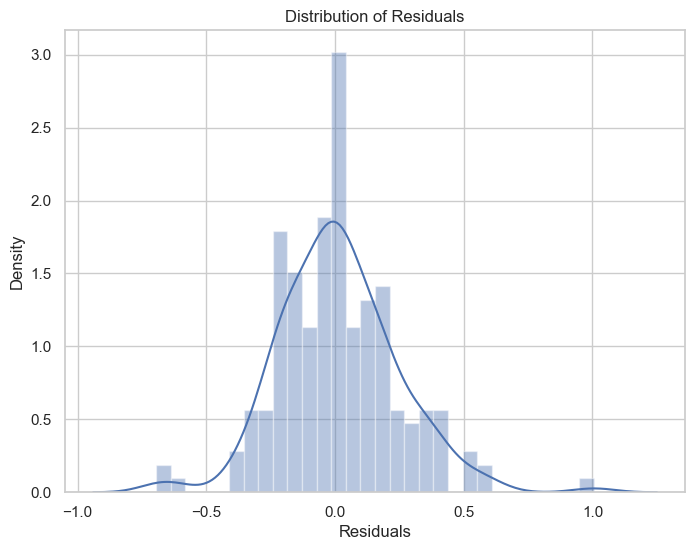

In [129]:
# Calculate residuals
residuals = y_test - y_pred

# Plot distribution of residuals
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.distplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()


**Observations:**
    

If the residuals in a regression model are normally distributed, it indicates that the model meets key assumptions, leading to:

Validated Assumptions- Assurance that the model's assumptions, particularly regarding error distribution, are met, ensuring unbiased parameter estimates and correct statistical inference.

Reliable Inference- Increased confidence in statistical tests and interval estimates, as normally distributed residuals yield more accurate p-values and confidence intervals.

Accurate Predictions- Confirmation that the model accurately captures data patterns, enhancing predictive accuracy and reducing systematic biases in predictions.

Efficient Estimates- Expectation of efficient and unbiased parameter estimates, indicating that regression coefficients closely approximate true population parameters.

Clear Interpretation- Simplified interpretation of model coefficients, facilitating a clearer understanding of how predictor variables influence the dependent variable.

In essence, normally distributed residuals affirm the model's validity, ensuring more accurate predictions, reliable inference, and straightforward interpretation of results.

# Exporting the models

In [130]:
import pickle
pickle.dump(df,open("df.pkl","wb"))
pickle.dump(pipe,open("pipe.pkl","wb"))

# Deployment Notes

<div style="background-color: #f0f0f0; padding: 20px; border-radius: 10px;">
    <p><strong style="color: #000000;">Deployment</strong></p>
    <p><strong style="color: #000000;">For Deployment of my model, I have used Streamlit.</strong></p>
    <p><strong style="color: #000000;">For writing code for deployment, I have used VS Code as my IDE.</strong></p>
    <p><strong style="color: #000000;">To run the Streamlit app, it's important to download Streamlit in the terminal with the command:</strong></p>
    <pre><strong style="color: #000000;">pip install streamlit</strong></pre>
    <p><strong style="color: #000000;">To run the app, I opened the PowerShell terminal in VS Code and wrote the command:</strong></p>
    <pre><strong style="color: #000000;">streamlit run app.py</strong></pre>
</div>


<div style="background-color: #83FF33; padding: 20px; border-radius: 10px;">
    <strong style="color: #000000;">Conclusion:</strong>
    <ul>
        <li style="color: #000000;"><strong>Which features have the most significant impact on laptop prices?</strong><br>
            - As per my analysis reveals that several features significantly influence the price determination of laptops. Key factors such as the company name, type, screen resolution, and CPU type are crucial determinants of laptop prices. However, certain features like flash storage and hybrid configurations showed minimal correlation with price and were subsequently dropped during feature engineering to streamline model performance.
        </li>
        <li style="color: #000000;"><strong>Can the model accurately predict the prices of laptops from lesser-known brands?</strong><br>
            - My model's accuracy rate of 85% indicates its capability to reasonably predict the prices of lesser-known laptops. For instance, the Fujitsu CH 13th Gen Intel Core i7 13.3 laptop's predicted price closely aligns with its actual price, showcasing the model's effectiveness even for less mainstream brands.
            <ul>
                <li>Specifications used for Fujitsu CH 13th Gen Intel Core i7 laptop(Lesser Known Laptop):<br>
                    [Fujitsu,NOTEBOOK,16,WINDOWS,1.00,NO,YES,13.30,1920*1080,Intel Core i7,0,512,Intel]
                </li>
            </ul>
        </li>
        <li style="color: #000000;"><strong>Does the brand of the laptop significantly influence its price?</strong><br>
            - The brand of a laptop significantly influences its price, often reflecting the brand's perceived value and reputation. For example, laptops from renowned brands like Apple command higher prices even with comparable specifications to other brands due to their brand equity.
            <ul>
                <li>Specifications used for Apple Mac - from the dataset:<br>
                    [Apple,Ultrabook,8,MAC,1.37,NO,YES,13.30,2560x1440,Intel Core i5,0,128,Intel]
                </li>
                <li>Specification used For HP Notebook laptop from Amazon:<br>
                    [HP,NOTEBOOK,8,WINDOWS,1.59,NO,NO,15.60,1920*1080,AMD PROCESSOR,0,512,AMD]
                </li>
            </ul>
        </li>
        <li style="color: #000000;"><strong>How well does the model perform on laptops with high-end specifications compared to budget laptops?</strong><br>
            - As seen in the Previous Example, Laptops with high-end specifications generally command higher prices compared to budget laptops. Features such as dedicated graphics cards, higher RAM, and premium build materials contribute to the higher price tag of high-end models like gaming laptops, such as the HP Omen, compared to standard notebook models.
        </li>
        <li style="color: #000000;"><strong>What are the limitations and challenges in predicting laptop prices accurately?</strong><br>
            - While my model demonstrates an accuracy rate of 85% after hyperparameter tuning, it's important to note that it provides an approximate range rather than precise predictions. This limitation underscores the need for users to interpret the predicted prices within a reasonable margin of error.
        </li>
        <li style="color: #000000;"><strong>How does the model perform when predicting the prices of newly released laptops not present in the training dataset?</strong><br>
            - Predicting the prices of newly launched laptop models poses a challenge since they're not present in the training dataset. In such cases, leveraging the specifications of existing laptop models in the dataset and considering market trends can aid in providing estimates for newly launched laptops.
            <ul>
                <li>For Newly Launched Laptop not present in the data - HP OMEN Gaming Laptop, 13th Gen Intel Core i5 (Launched in 2023 in India):<br>
                    Specifications used for HP OMEN Gaming Laptop, 13th Gen Intel Core i5 (Launched in 2023 in India):<br>
                    [HP,GAMING,16,WINDOWS,2.32,NO,YES,16.10,1920*1080,Intel Core i5,0,512,Nvidia]
                </li>
            </ul>
        </li>
    </ul>
</div>


<div style="background-color: #f0f0f0; padding: 20px; border-radius: 10px;">
    <p><strong style="color: #000000;">Sources And Links from amazon:</strong></p>
    <ul>
        <li><strong><a href="https://amzn.in/d/eiFXxQr" target="_blank" style="color: #000000;">For prediction of HP notebook laptop:</a></strong></li>
        <li><strong><a href="https://amzn.in/d/87dgnZB" target="_blank" style="color: #000000;">For lesser-known brand like Fujitsu CH 13th Gen Intel Core i7 13.3:</a></strong></li>
        <li><strong><a href="https://amzn.in/d/0ANIaa4" target="_blank" style="color: #000000;">For Newly Launched Laptop not present in the data - HP OMEN Gaming Laptop, 13th Gen Intel Core i5 (Launched in 2023 in India):</a></strong></li>
    </ul>
</div>


<div style="background-color: #ffffcc; padding: 20px; border-radius: 10px;">
    <strong style="color: #000000;">Acknowledgement:</strong>
    <br><br>
    <p style="color: #000000;">I would like to extend <em>my</em> heartfelt gratitude to Odin School for providing all the students with the invaluable opportunity to undertake this project. Their unwavering support and guidance have been instrumental in navigating through the challenges encountered during this period.</p>
    <p style="color: #000000;">I am immensely grateful for the mentorship, encouragement, and resources provided by the faculty and staff at Odin School, which have enabled us to delve deeper into our project and achieve meaningful outcomes. Their dedication and commitment to our growth and learning journey have truly made a difference.</p>
    <p style="color: #000000;">In conclusion, I extend my sincere thanks to Odin School for fostering an environment of learning, innovation, and growth, and for their unwavering support throughout this endeavor.</p>
</div>


<div style="background-color: #cceeff; padding: 20px; border-radius: 10px;">
    <p style="font-size: 18px; font-weight: bold; color: #000000; margin-bottom: 10px;">Thank You!</p>
    <p style="font-size: 16px; color: #000000;">- Project By Ricky Warich-S6993</p>
</div>
